# New York City Crime Analysis
## For the Years: 2014 - 2015

Written by:
**Peng Xu**

data source: https://www.kaggle.com/adamschroeder/crimes-new-york-city.

Objective:
- NYC crime status in 2014-2015 with descriptive statistics 
- Each crime features
- Infer the potential factors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import matplotlib.ticker as mtick #Found this import for formatting percentages neatly on x/y axis of our graphs
plt.rcParams['font.family'] = "serif"
%matplotlib inline

### Data Explore and Data Cleaning:
How many columns in the dataset and what data types are they? Do they have missing data?
First we are displaying all the columns that we are using and what datatype they are.  
<br/>Next we are displaying a count of how many 'Null' values each column has.  


In [2]:
NYC = pd.read_csv("NYPD_Complaint_Data_Historic.csv")
NYC.info()
NYC.isnull().sum()

C:\Users\gary_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
CMPLNT_NUM           1048575 non-null int64
CMPLNT_FR_DT         1048510 non-null object
CMPLNT_FR_TM         1048575 non-null object
CMPLNT_TO_DT         842616 non-null object
CMPLNT_TO_TM         843002 non-null object
RPT_DT               1048575 non-null object
KY_CD                1048575 non-null int64
OFNS_DESC            1045695 non-null object
PD_CD                1047842 non-null float64
PD_DESC              1047842 non-null object
CRM_ATPT_CPTD_CD     1048574 non-null object
LAW_CAT_CD           1048575 non-null object
JURIS_DESC           1048575 non-null object
BORO_NM              1048575 non-null object
ADDR_PCT_CD          1048574 non-null float64
LOC_OF_OCCUR_DESC    830823 non-null object
PREM_TYP_DESC        1043886 non-null object
PARKS_NM             7599 non-null object
HADEVELOPT           51772 non-null object
X_COORD_CD           1016158 non-null fl

CMPLNT_NUM                 0
CMPLNT_FR_DT              65
CMPLNT_FR_TM               0
CMPLNT_TO_DT          205959
CMPLNT_TO_TM          205573
RPT_DT                     0
KY_CD                      0
OFNS_DESC               2880
PD_CD                    733
PD_DESC                  733
CRM_ATPT_CPTD_CD           1
LAW_CAT_CD                 0
JURIS_DESC                 0
BORO_NM                    0
ADDR_PCT_CD                1
LOC_OF_OCCUR_DESC     217752
PREM_TYP_DESC           4689
PARKS_NM             1040976
HADEVELOPT            996803
X_COORD_CD             32417
Y_COORD_CD             32417
Latitude               32417
Longitude              32417
Lat_Lon                32417
dtype: int64

### Data Explore and Data Cleaning:
#### Part 2: Is the data only for the years 2014-2015?
Upon further inspection of our dataset, we noticed that even though this data was suppossed to contain crime data for only the years 2014 & 2015, this was not the case.  Our first order of business was to create a dataframe, **df** that contained ONLY the rows that contained crimes that happened in the years 2014 & 2015

In [3]:
# Extract year and only select the event happped in 2014 or 2015
df = NYC
print(df.RPT_DT.head(3))
#create the year column
df["year"] = [date[-4:] for date in df.RPT_DT]
#filter the year by only selecting 2014 and 2015
df = df[(df["year"] == "2014") | (df["year"] == "2015")]

0    12/31/2015
1    12/31/2015
2    12/31/2015
Name: RPT_DT, dtype: object


### QUESTION 1:
#### What time of the day are crimes happening in NYC (2014-2015)?

- Transform the date into panda datatime format by ** to_dattime **.
- Extract the hour using ** .to.hour**
- Bar plot the crime distribution among a day by hour as unit.

Text(0.5,1,'What Time of the Day are Crimes Happening? (2014-2015)')

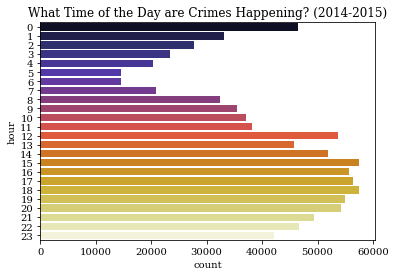

In [4]:
hours = [i for i in range(24)]

df_hours = pd.to_datetime(df.CMPLNT_FR_TM).dt.hour
df_hours = pd.DataFrame({'hour':df_hours})


sns.countplot(y='hour', data=df_hours, palette = "CMRmap", order=hours)
plt.title('What Time of the Day are Crimes Happening? (2014-2015)')

### QUESTION 2:
#### What time in a day does the different crime happen?
- Select four the most popular crime as the category
- Transform each type of crime to datetime
- Bart plot

#### As you can see, 
- Larceney primarily happens in the afternoon. 
- The harrassment has the same case. 
- Assult happens both middle night and afternoon. 
- The majority of sex crime occurs at the middle night.

Text(0.5,1,'SEX CRIMES')

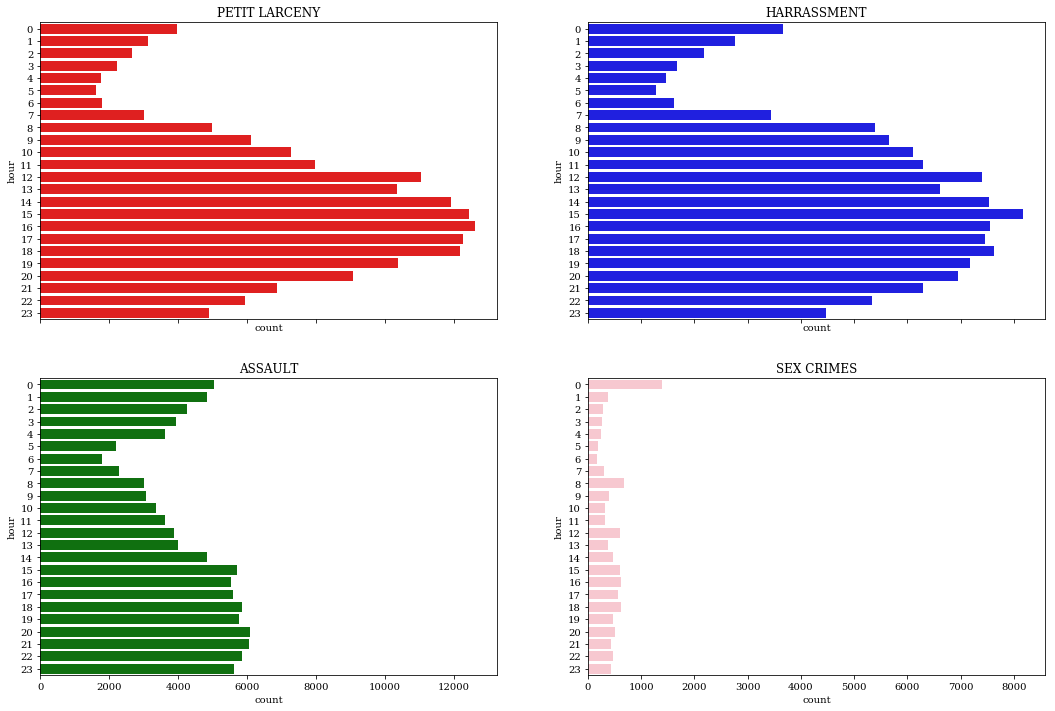

In [11]:
f, axes = plt.subplots(2, 2, figsize=(18, 12), sharex='col')


crime_larceny = pd.to_datetime(df[df.OFNS_DESC == 'PETIT LARCENY'].CMPLNT_FR_TM).dt.hour 
crime_larceny = pd.DataFrame({'hour':crime_larceny})
sns.countplot(y='hour', data=crime_larceny, color = "red", order=hours, ax=axes[0,0])
axes[0, 0].set_title('PETIT LARCENY')


crime_harrassment = pd.to_datetime(df[df.OFNS_DESC == 'HARRASSMENT 2'].CMPLNT_FR_TM).dt.hour
crime_harrassment = pd.DataFrame({'hour':crime_harrassment})
sns.countplot(y='hour', data=crime_harrassment, color = "blue", order=hours,ax=axes[0,1])
axes[0, 1].set_title('HARRASSMENT')

crime_assault = pd.to_datetime(df[df.OFNS_DESC == 'ASSAULT 3 & RELATED OFFENSES'].CMPLNT_FR_TM).dt.hour
crime_assault = pd.DataFrame({'hour':crime_assault})
sns.countplot(y='hour', data=crime_assault, color = "green", order=hours,ax=axes[1,0])
axes[1, 0].set_title('ASSAULT')

crime_sex = pd.to_datetime(df[df.OFNS_DESC == 'SEX CRIMES'].CMPLNT_FR_TM).dt.hour
crime_sex = pd.DataFrame({'hour':crime_sex})
sns.countplot(y='hour', data=crime_sex, color = "pink", order=hours, ax=axes[1,1])
axes[1, 1].set_title('SEX CRIMES')

### QUESTIONS 3
#### Which month do the majority of crimes happen ?

- Bar plot the crime times in a year.
- Bar plot the crime times for the top 4 crime types.

### Conclusion: The summer crime rate is higher than in the winter.


In [6]:
def month(date):
    month = pd.to_datetime(date).dt.month
    return pd.DataFrame({'month':month})

Text(0.5,1,'SEX CRIMES')

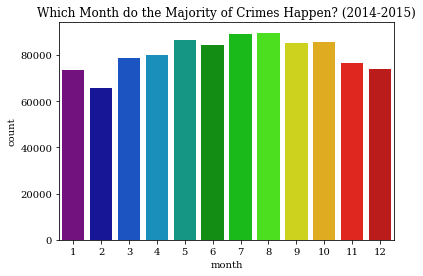

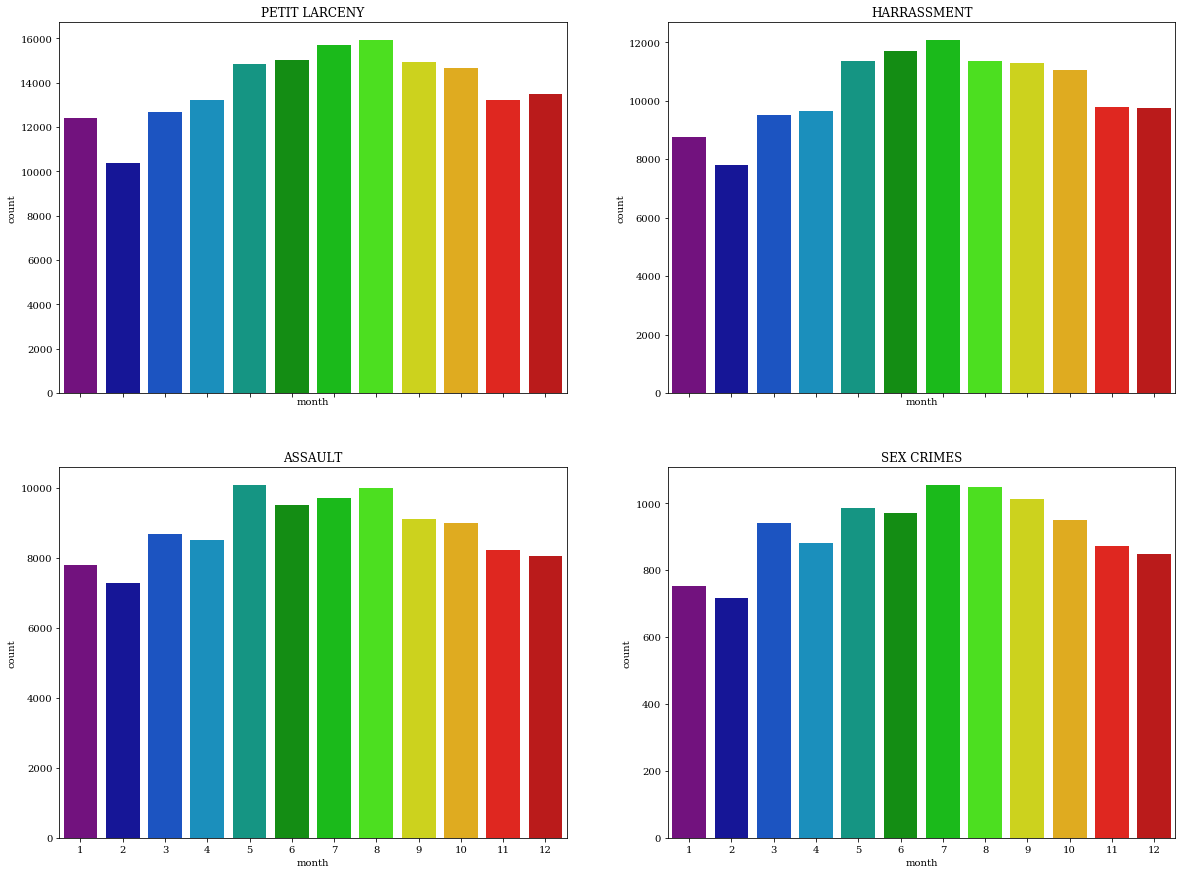

In [14]:
sns.countplot(x='month', data=month(df.RPT_DT), palette = "nipy_spectral")
plt.title('Which Month do the Majority of Crimes Happen? (2014-2015)')

f, axes = plt.subplots(2, 2,figsize=(20,15),sharex='col')

crime_larceny = month(df[df.OFNS_DESC == 'PETIT LARCENY' ].RPT_DT)
sns.countplot(x='month', data=crime_larceny, palette = "nipy_spectral",  ax=axes[0,0])
axes[0, 0].set_title('PETIT LARCENY')


crime_harrassment = month(df[df.OFNS_DESC == 'HARRASSMENT 2'].RPT_DT)
sns.countplot(x='month', data=crime_harrassment, palette = "nipy_spectral", ax=axes[0,1])
axes[0, 1].set_title('HARRASSMENT')

crime_assault = month(df[df.OFNS_DESC == 'ASSAULT 3 & RELATED OFFENSES'].RPT_DT)
sns.countplot(x='month', data=crime_assault, palette = "nipy_spectral", ax=axes[1,0])
axes[1, 0].set_title('ASSAULT')

crime_sex = month(df[df.OFNS_DESC == 'SEX CRIMES'].RPT_DT)
sns.countplot(x='month', data=crime_sex, palette = "nipy_spectral", ax=axes[1,1])
axes[1, 1].set_title('SEX CRIMES')

### QUESTIONS 4

### Hypothesis: The temperature is positively correlated with the crime rates.

- Scatter plot the two variables
- Calculate the association coefficience


#### Based on the figures,
- The crime rates increase when it is warm.
- The high correlation coefficience strongly indicated the strong relation between temperature and crime rates.

The correlation coefficence between crime counts and average temperature is 0.46


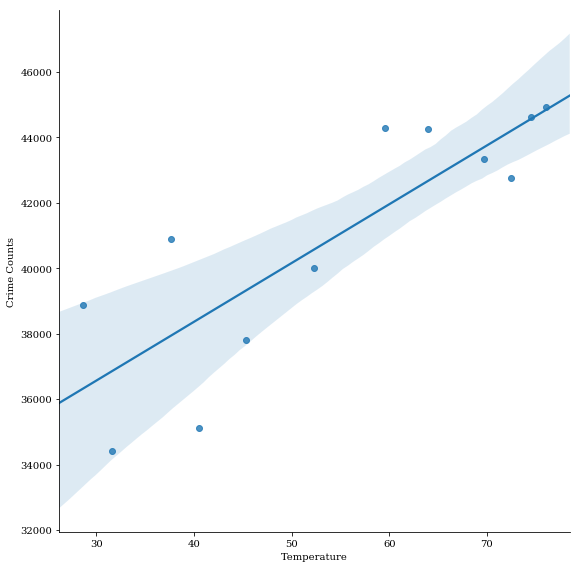

In [17]:
# Select the 2014 data
df_2014 = df[df["year"] == "2014"]
month_name = {1: "JAN",2: "FEB",3: "MAR",4:"APR", 5:"MAY", 6:"JUN",
              7: "JUL",8: "AUG",9: "SEP",10:"OCT", 11:"NOV",12:"DEC" }

# Count the crimes time with dictionary and transform into pandas series.
a1 = pd.to_datetime(df_2014.RPT_DT).dt.month
b = a1.value_counts()
   
d = {}
for m, c in b.items():
    d[month_name[m]] = c

count_list = []
for i in month_name.values():
    count_list.append(d[i])
count_list
crime_month_2014 = pd.Series(count_list, index = month_name.values())

NYC_temp_avg = pd.read_csv("NYC_temperature_Avg.csv")
temp_2014 = NYC_temp_avg[NYC_temp_avg.YEAR == 2014].drop(columns = ['YEAR',"ANNUAL"])
temp_T = temp_2014.transpose()
#t1 = pd.merge(temp_2014, crime_month_2014, how = "left")
df_new = pd.concat([temp_T, crime_month_2014],axis = 1)
df_new.columns = ['Temperature', "Crime Counts"]

# Scartter plot the two variables.
ax = sns.pairplot(data=df_new, x_vars="Temperature", y_vars='Crime Counts', kind="reg", size = 8)
# Calculate the correlation coefficence

tt = df_new.Temperature.pct_change()
dd = df_new['Crime Counts'].pct_change()

df_new.Temperature.corr(df_new['Crime Counts'])

print("The correlation coefficence between crime counts and average temperature is {:.2f}". format(tt.corr(dd)))